# Übung 6.1 - k-Means Clustering Visualisierung
VO Maschinelles Lernen in der Produktion, W2020/21, Moritz von Unold, Richard Lux, Felix Soest

#### Visualisierung k-Means: Anzahl Cluster und Mean-Squared-Distance.

#### Führe dieses Notebook erst aus wenn du mit dem Notebook 6.1 - k-Means Clustering fertig bist und dich für eine Clusteranzahl entschieden hast.

### 0. Imports

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import cluster

pd.options.mode.chained_assignment = None

%matplotlib inline

my_seed = TODO

df = pd.read_excel('Daten_Clustering.xlsx')
X_train = df.copy(deep=True)

### 1. Visualisierung mittlerer quadratischer Abstand je Cluster

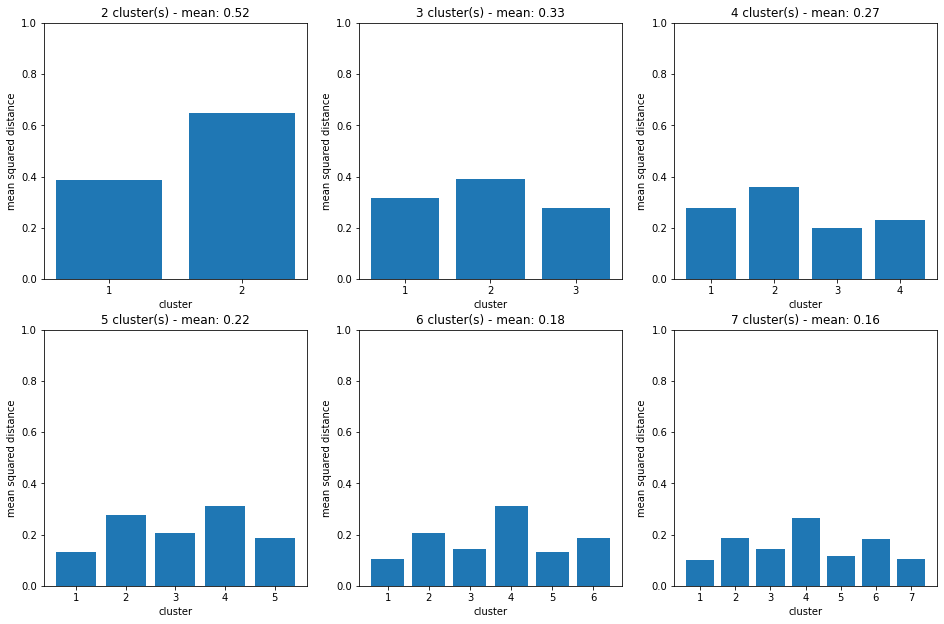

In [55]:
range_clusters = [TODO]
plt.figure(figsize=(16, 16))
for clus in range_clusters:
    # Erstelle Modell
    kmeans = cluster.KMeans(
        n_clusters=clus, init="k-means++", n_init=10, random_state=my_seed
    )
    kmeans = kmeans.fit(X_train)
    # Berechne Abstand
    mean_squared_distances = []
    cluster_names = []
    for i in range(len(kmeans.cluster_centers_)):
        mask = kmeans.labels_ == i
        mean_squared_distance = (
            (X_train["x1"][mask] - kmeans.cluster_centers_[i][0]) ** 2
            + (X_train["x2"][mask] - kmeans.cluster_centers_[i][1]) ** 2
            + (X_train["x3"][mask] - kmeans.cluster_centers_[i][2]) ** 2
        ).mean()
        mean_squared_distances.append(mean_squared_distance)
        cluster_names.append(str(i + 1))
    # Zeichne Bar-Plot
    plt.subplot(3, 3, clus - 1)
    plt.bar(cluster_names, mean_squared_distances)
    plt.ylim([0, 1])
    plt.xlabel("cluster")
    plt.ylabel("mean squared distance")
    plt.title(
        str(clus)
        + " cluster(s) - mean: "
        + str("%.2f" % (sum(mean_squared_distances) / len(mean_squared_distances)))
    )
plt.show()

### 2. Visualisierung Silhouetten-Wert je Punkt

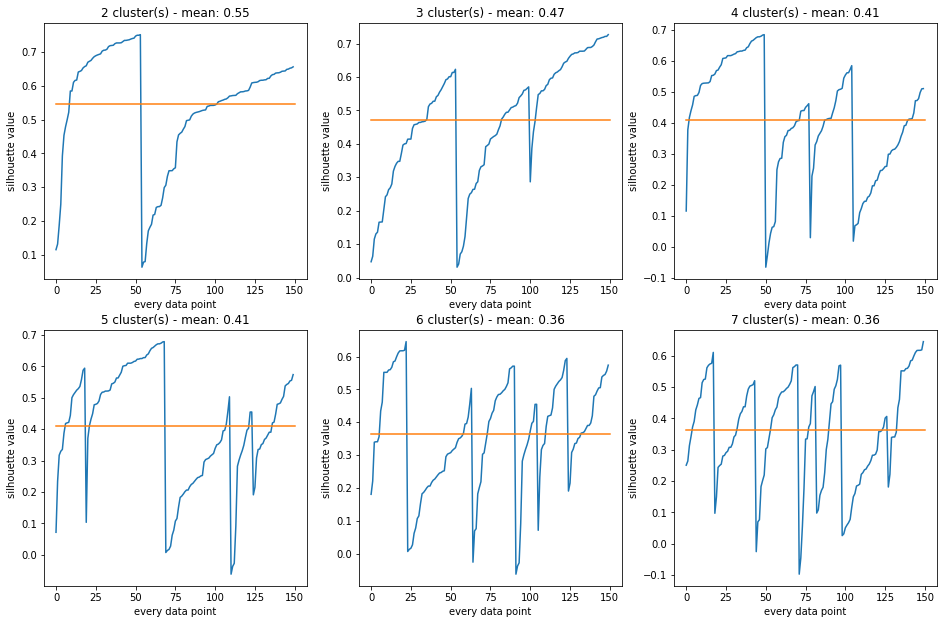

In [56]:
plt.figure(figsize=(16, 16))
for clus in range_clusters:
    # Erstelle Modell
    kmeans = cluster.KMeans(
        n_clusters=clus, init="k-means++", n_init=10, random_state=my_seed
    )
    kmeans = kmeans.fit(X_train)
    # Berechne Abstand
    # Ausgabe Silhouetten-Wert je Punkt je Cluster
    df["silhouette"] = silhouette_samples(X_train, kmeans.labels_)
    df["labels"] = kmeans.labels_
    df = df.sort_values(["labels", "silhouette"])
    plt.subplot(3, 3, clus - 1)
    plt.plot(range(len(df)), df["silhouette"])
    plt.plot(
        [0, len(df)],
        [
            silhouette_score(X_train, kmeans.labels_),
            silhouette_score(X_train, kmeans.labels_),
        ],
    )
    plt.title(
        str(clus)
        + " cluster(s) - mean: "
        + str("%.2f" % silhouette_score(X_train, kmeans.labels_))
    )
    plt.xlabel("every data point")
    plt.ylabel("silhouette value")
plt.show()

### 3. Visualisierung mittlerer quadratischer Abstand und Silhouetten-Wert aller Cluster 

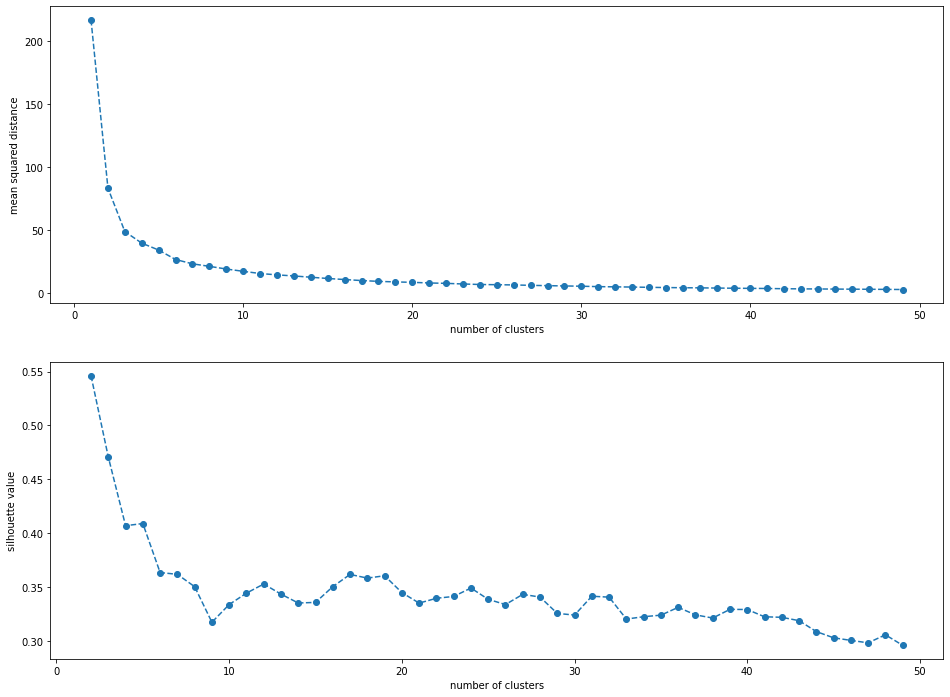

In [57]:
range_clusters = TODO
range_clusters = range_clusters[1:]
mean_errors = []
clusters = []
silhouettes = []
for clus in range_clusters:
    # Erstelle Modell
    kmeans = cluster.KMeans(
        n_clusters=clus, init="k-means++", n_init=10, random_state=my_seed
    )
    kmeans = kmeans.fit(X_train)
    # Berechne Abstand
    if clus != 1:
        silhouettes.append(silhouette_score(X_train, kmeans.labels_))
    mean_errors.append(kmeans.inertia_)
    clusters.append(clus)
plt.figure(figsize=(16, 12))
plt.subplot(2, 1, 1)
plt.plot(clusters, mean_errors, "o--")
plt.xlabel("number of clusters")
plt.ylabel("mean squared distance")
plt.subplot(2, 1, 2)
plt.plot(clusters[1:], silhouettes, "o--")
plt.xlabel("number of clusters")
plt.ylabel("silhouette value")
plt.show()